# Day 4: 4.1
1. How to Deal with Multi-Class Classification
2. Additional package which helps us Extended Matrix
3. Cross Validation and Hyper parameter Tuning

## XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

### Multi-class Classification:

   - **Dealing with a dataset with categorical label column having more than 2 unique values.**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa

import warnings
warnings.filterwarnings('ignore')

C:\Users\shubh\anaconda3\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.7.0 and strictly below 2.10.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
data.iloc[:,:-1].values

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Here we can observe that the dataset is well balanced

In [7]:
# features and labels
features = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values

In [8]:
# Normalizing the Features
from sklearn.preprocessing import StandardScaler
scFeatures = StandardScaler()
features = scFeatures.fit_transform(features)

In [9]:
# Handle Multi-class classification by converting it ti an DummyVariable

from sklearn.preprocessing import LabelEncoder
leSpecies = LabelEncoder()
label = leSpecies.fit_transform(label)


#label_2d = np.array(pd.get_dummies(label))

# To create Dummy Variables we can use Keras Functionality
kerasLabel = tf.keras.utils.to_categorical(label)
kerasLabel

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Modeling


### 1. Architect the Model

In [10]:
# Step:1 Create a Sequential Model

model = tf.keras.Sequential()

# Step2: Create Dense Layes with usints, activation and input shape
model.add(tf.keras.layers.Dense(units= 12, activation= 'relu', input_shape=(4,)))  # Input Layer
model.add(tf.keras.layers.Dense(units= 12, activation= 'relu'))  # Hidden Layer 1
model.add(tf.keras.layers.Dense(units= 12, activation= 'relu'))  # Hidden Layer 2
model.add(tf.keras.layers.Dense(units= 12, activation= 'relu'))  # Hidden Layer 3

# Number of units in output layer for multi-class classification is equal to the no. of unique labels 
model.add(tf.keras.layers.Dense(units= 3, activation= 'softmax'))  # Output Layer

### Compile Model


- **Loss:** 
    - **binary_crossentropy (BinaryClassification)**
    - **categorical_crossentropy (MuliclassClassification)**

In [11]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=["accuracy"])

In [12]:
# Custom Callback

class MyThresholdCallBack(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallBack, self).__init__()
        self.cl = cl
        
    def on_epoch_end(self, epoch, logs=None):
        test_score = logs["val_accuracy"]
        train_score = logs["accuracy"]
        
        if test_score > self.cl and test_score > train_score:
            self.model.stop_training = True

### Model Training

In [13]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    kerasLabel, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [14]:
accuracy_Threshold = MyThresholdCallBack(cl=0.95)

history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[accuracy_Threshold])

Epoch 1/1000
4/4 [==============================] - 1s 83ms/step - loss: 1.2334 - accuracy: 0.3583 - val_loss: 1.2498 - val_accuracy: 0.2333
Epoch 2/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.1982 - accuracy: 0.3583 - val_loss: 1.2182 - val_accuracy: 0.2333
Epoch 3/1000
4/4 [==============================] - 0s 20ms/step - loss: 1.1690 - accuracy: 0.3583 - val_loss: 1.1920 - val_accuracy: 0.2333
Epoch 4/1000
4/4 [==============================] - 0s 24ms/step - loss: 1.1442 - accuracy: 0.3583 - val_loss: 1.1695 - val_accuracy: 0.2333
Epoch 5/1000
4/4 [==============================] - 0s 19ms/step - loss: 1.1216 - accuracy: 0.3583 - val_loss: 1.1495 - val_accuracy: 0.2333
Epoch 6/1000
4/4 [==============================] - 0s 20ms/step - loss: 1.1026 - accuracy: 0.3583 - val_loss: 1.1318 - val_accuracy: 0.2333
Epoch 7/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.0865 - accuracy: 0.3667 - val_loss: 1.1167 - val_accuracy: 0.2333
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.6912 - accuracy: 0.8250 - val_loss: 0.7612 - val_accuracy: 0.8667
Epoch 60/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.6837 - accuracy: 0.8250 - val_loss: 0.7543 - val_accuracy: 0.8667
Epoch 61/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.6772 - accuracy: 0.8250 - val_loss: 0.7475 - val_accuracy: 0.8667
Epoch 62/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.6707 - accuracy: 0.8250 - val_loss: 0.7405 - val_accuracy: 0.8667
Epoch 63/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6640 - accuracy: 0.8250 - val_loss: 0.7339 - val_accuracy: 0.8667
Epoch 64/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.6568 - accuracy: 0.8250 - val_loss: 0.7269 - val_accuracy: 0.8667
Epoch 65/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.6502 - accuracy: 0.8250 - val_loss: 0.7190 - val_accuracy: 0.8667
Epoch 

4/4 [==============================] - 0s 22ms/step - loss: 0.3380 - accuracy: 0.8917 - val_loss: 0.3825 - val_accuracy: 0.9000
Epoch 117/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.3346 - accuracy: 0.9000 - val_loss: 0.3792 - val_accuracy: 0.9000
Epoch 118/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.3318 - accuracy: 0.9000 - val_loss: 0.3743 - val_accuracy: 0.9000
Epoch 119/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.3282 - accuracy: 0.9000 - val_loss: 0.3707 - val_accuracy: 0.9000
Epoch 120/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.3256 - accuracy: 0.9083 - val_loss: 0.3684 - val_accuracy: 0.9000
Epoch 121/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.3219 - accuracy: 0.9000 - val_loss: 0.3648 - val_accuracy: 0.9000
Epoch 122/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.3194 - accuracy: 0.9083 - val_loss: 0.3616 - val_accuracy: 0.9000
Epoch 123/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.2183 - accuracy: 0.9500 - val_loss: 0.2510 - val_accuracy: 0.9000
Epoch 174/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.2177 - accuracy: 0.9583 - val_loss: 0.2473 - val_accuracy: 0.9000
Epoch 175/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.2153 - accuracy: 0.9500 - val_loss: 0.2461 - val_accuracy: 0.9000
Epoch 176/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.2139 - accuracy: 0.9500 - val_loss: 0.2454 - val_accuracy: 0.9000
Epoch 177/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2121 - accuracy: 0.9583 - val_loss: 0.2452 - val_accuracy: 0.9000
Epoch 178/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2107 - accuracy: 0.9583 - val_loss: 0.2442 - val_accuracy: 0.9000
Epoch 179/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2095 - accuracy: 0.9583 - val_loss: 0.2427 - val_accuracy: 0.9000
Epoch 180/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.1564 - accuracy: 0.9750 - val_loss: 0.1831 - val_accuracy: 0.9667
Epoch 231/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1558 - accuracy: 0.9750 - val_loss: 0.1813 - val_accuracy: 0.9667
Epoch 232/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1546 - accuracy: 0.9750 - val_loss: 0.1800 - val_accuracy: 0.9667
Epoch 233/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1544 - accuracy: 0.9750 - val_loss: 0.1789 - val_accuracy: 0.9667
Epoch 234/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1541 - accuracy: 0.9750 - val_loss: 0.1787 - val_accuracy: 0.9667
Epoch 235/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1529 - accuracy: 0.9750 - val_loss: 0.1779 - val_accuracy: 0.9667
Epoch 236/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.1515 - accuracy: 0.9750 - val_loss: 0.1760 - val_accuracy: 0.9667
Epoch 237/1000

4/4 [==============================] - 0s 40ms/step - loss: 0.1212 - accuracy: 0.9750 - val_loss: 0.1351 - val_accuracy: 0.9667
Epoch 288/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.1212 - accuracy: 0.9750 - val_loss: 0.1359 - val_accuracy: 0.9667
Epoch 289/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.1201 - accuracy: 0.9750 - val_loss: 0.1354 - val_accuracy: 0.9667
Epoch 290/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1196 - accuracy: 0.9750 - val_loss: 0.1352 - val_accuracy: 0.9667
Epoch 291/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1188 - accuracy: 0.9750 - val_loss: 0.1335 - val_accuracy: 0.9667
Epoch 292/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1183 - accuracy: 0.9750 - val_loss: 0.1325 - val_accuracy: 0.9667
Epoch 293/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1187 - accuracy: 0.9750 - val_loss: 0.1322 - val_accuracy: 0.9667
Epoch 294/1000

In [15]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

4/4 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.9667
[0.10422959923744202, 0.9666666388511658]
1/1 [==============================] - 0s 34ms/step - loss: 0.1129 - accuracy: 0.9667
[0.1129152774810791, 0.9666666388511658]


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label, np.argmax(model.predict(features), axis=-1))

5/5 [==============================] - 0s 2ms/step


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  0, 50]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(label, (np.argmax(model.predict(features), axis=-1))))

5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



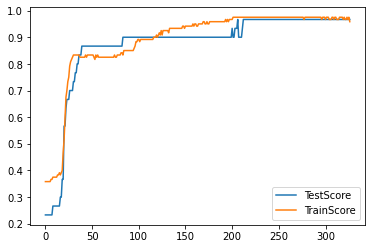

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.legend(['TestScore', 'TrainScore'])

In [19]:
def prediction_func():
    # Inputs
    sLength = float(input("Enter sepal length: "))
    sWidth = float(input("Enter sepal width: "))
    pLength = float(input("Enter petal length: "))
    pWidth = float(input("Enter petal width: "))
    
    # Creating a 2d array from inputs
    inpFeatures = np.array([[sLength,sWidth,pLength,pWidth]])
    
    # Transforming array as we have earlier perform the same
    scaledInput = scFeatures.transform(inpFeatures)

    # Predicting labeled value from scaled input
    predSpecies = (np.argmax(model.predict(scaledInput), axis=-1))

    # Fetching the type of flower
    flowerType = leSpecies.inverse_transform(predSpecies).item()

    print(f"The Flower having \n sepal_length: {sLength} \n sepal_width: {sWidth} \n petal_length: {pLength} \n petal_width: {pWidth} \n represents ==> {flowerType}")

In [20]:
prediction_func()

Enter sepal length: 5.1
Enter sepal width: 1.6
Enter petal length: 3.1
Enter petal width: 0.2
1/1 [==============================] - 0s 28ms/step
The Flower having 
 sepal_length: 5.1 
 sepal_width: 1.6 
 petal_length: 3.1 
 petal_width: 0.2 
 represents ==> versicolor


In [21]:
prediction_func()

Enter sepal length: 8
Enter sepal width: 6
Enter petal length: 1
Enter petal width: 2
1/1 [==============================] - 0s 27ms/step
The Flower having 
 sepal_length: 8.0 
 sepal_width: 6.0 
 petal_length: 1.0 
 petal_width: 2.0 
 represents ==> setosa
